### # 241,010,102       : 기저귀

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import scipy.stats as stats
import seaborn as sns

In [2]:
import os
os.getcwd()

'/Users/we/Downloads/업무/buy it again_분석 '

./chunk/

---

In [80]:
diaper_train = pd.read_excel('diaper_train.xlsx')
diaper_test = pd.read_excel('diaper_test.xlsx')

In [12]:
diaper_train.head(3)

,Unnamed: 0,biz_dt,m_id,order_price,prod_no,old_admin_category_id,serv_cd
105,105,2018-01-01 00:00:26,"6,200,018","34,900","1,472,659","241,010,102",1
212,212,2018-01-01 00:00:52,"2,683,481","32,000","1,597,856","241,010,102",1
2357,2357,2018-01-01 00:03:47,"3,579,286","104,700","1,766,436","241,010,102",1


In [13]:
diaper_train.m_id.nunique()   # 약 20만명(31~32주 동안)

212550

In [14]:
train_mid = diaper_train.m_id.unique()

In [15]:
diaper_train[diaper_train.m_id == train_mid[0]]

,Unnamed: 0,biz_dt,m_id,order_price,prod_no,old_admin_category_id,serv_cd
105,105,2018-01-01 00:00:26,"6,200,018","34,900","1,472,659","241,010,102",1
3125,3125,2018-01-01 00:04:27,"6,200,018","34,900","1,472,659","241,010,102",1
732522,10732522,2018-01-24 09:44:17,"6,200,018","15,800","3,201,607","241,010,102",1


---

## #  time interval 불러오기

In [3]:
tt = pd.read_csv('diaper_t.csv')

In [4]:
tt.head()

,Unnamed: 0,0
0,0,NaN
1,1,0.0
2,2,23.0
3,3,NaN
4,4,59.0


In [5]:
tt = tt.iloc[:,1:]

In [6]:
# 데이터 확인

tt.tail(10)   # 음 ... 꼬리에는 구매 데이터가 없으니깐 그런가봐

,0
545765,NaN
545766,NaN
545767,NaN
545768,NaN
545769,NaN
545770,NaN
545771,NaN
545772,NaN
545773,NaN
545774,NaN


In [7]:
tt.shape   # 54만개의 time interval

(545775, 1)

In [8]:
tt.count()   # 0인 관측치 제외하고, 33만개의 데이터

0    333225
dtype: int64

In [9]:
len(tt)-tt.count()  # 54만개 중, 약 21만개가 distinct user : datetime.diff() 메소드 이용하면, 첫번째 obs는 nan이 되니깐 맞아!

0    212550
dtype: int64

In [30]:
# train 데이터 확인

diaper_train.shape

(545775, 7)

In [31]:
# unique한 멤버 몇 명?

diaper_train.m_id.unique().shape

(212550,)

- 확인!

In [32]:
diaper_train.m_id.nunique()

212550

---

# # t (interval) 분석해보자

In [10]:
tt.shape

(545775, 1)

In [11]:
tt = tt.dropna()  # t값 순수하게 얻은거야

In [12]:
# nan값 제거하고 얻은 shape

tt.shape

(333225, 1)

In [13]:
tt.head()

,0
1,0.0
2,23.0
4,59.0
5,0.0
6,31.0


In [14]:
# time 으로 column명 변경
tt.columns = ['time']

In [15]:
tt.head(5)

,time
1,0.0
2,23.0
4,59.0
5,0.0
6,31.0


In [16]:
#음.. 여기도 0인값이 많구나? - 무려 5만개야

tt.time.value_counts()

0.0      57461
14.0      6597
20.0      6597
21.0      6572
15.0      6335
17.0      6236
18.0      6232
13.0      6209
19.0      6181
27.0      6042
16.0      5940
28.0      5882
22.0      5860
23.0      5682
26.0      5579
24.0      5531
12.0      5476
25.0      5429
29.0      5348
1.0       4994
11.0      4833
30.0      4809
10.0      4765
31.0      4498
9.0       4374
8.0       4236
32.0      4166
7.0       4122
33.0      4075
2.0       4018
         ...  
176.0       45
185.0       38
193.0       37
180.0       35
184.0       34
175.0       34
186.0       30
191.0       27
190.0       26
192.0       26
187.0       25
194.0       24
189.0       24
188.0       24
197.0       21
199.0       21
204.0       18
196.0       16
200.0       15
198.0       13
195.0       13
202.0       13
201.0       12
203.0       11
206.0        9
205.0        7
210.0        6
209.0        5
207.0        5
208.0        3
Name: time, Length: 211, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10b267828>]],
      dtype=object)

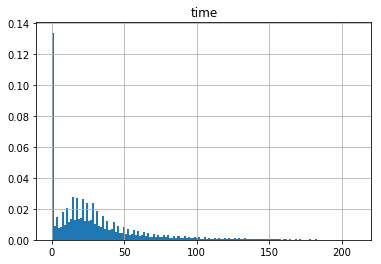

In [17]:
# time=0 인 값이 너무 많아보여서, histogram으로 다시 한번.

pd.DataFrame(tt).hist(bins=150, density = True)

histogram : 와... 0이 너무많아!

In [18]:
tmean = tt.mean()

In [19]:
# 0을 포함했을때의 평균.. 어느정도 될까?

tmean

time    29.54763
dtype: float64

# # drop 0 value : t

In [20]:
# 0인것을 드랍하는 작업! (차원이 여러개인 data.frame에서 axis 이용해서)

tt_drop0 = tt[(tt[['time']] != 0).all(axis=1)]   # 1차원 프레임에서 똑같은 작업 : tt[tt.time != 0]

---

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1cd32cf8>]],
      dtype=object)

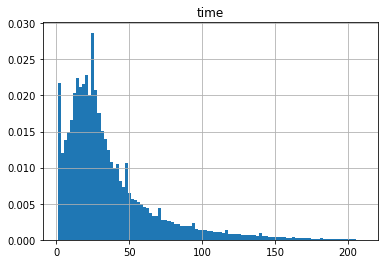

In [32]:
tt_drop0.hist(bins=100, density = True)

In [49]:
#0인 관측치들 제외하고, 평균 약 35일

tt_drop0.mean()

time    35.704476
dtype: float64

## # tt_drop0drop1 : 1일만에 재주문한 애들도 제외!

In [27]:
tt_drop0drop1 = tt_drop0[tt_drop0.time != 1 ]

In [29]:
tt_drop0drop1.time.value_counts()

20.0     6597
14.0     6597
21.0     6572
15.0     6335
17.0     6236
18.0     6232
13.0     6209
19.0     6181
27.0     6042
16.0     5940
28.0     5882
22.0     5860
23.0     5682
26.0     5579
24.0     5531
12.0     5476
25.0     5429
29.0     5348
11.0     4833
30.0     4809
10.0     4765
31.0     4498
9.0      4374
8.0      4236
32.0     4166
7.0      4122
33.0     4075
2.0      4018
34.0     3960
6.0      3873
         ... 
176.0      45
185.0      38
193.0      37
180.0      35
184.0      34
175.0      34
186.0      30
191.0      27
190.0      26
192.0      26
187.0      25
194.0      24
189.0      24
188.0      24
197.0      21
199.0      21
204.0      18
196.0      16
200.0      15
198.0      13
195.0      13
202.0      13
201.0      12
203.0      11
206.0       9
205.0       7
210.0       6
209.0       5
207.0       5
208.0       3
Name: time, Length: 209, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1cca3f98>]],
      dtype=object)

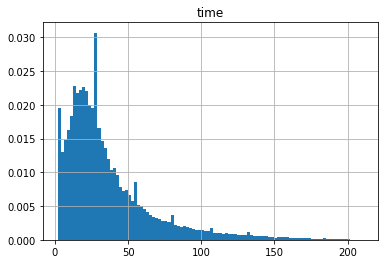

In [31]:
tt_drop0drop1.hist(bins=100, density = True)  # 그래프가 많이 차이나지는 않네!

---

---

---

# 2. 파라미터 추정

### # (1) gamma.fit으로 parameters 추정해볼게.

In [50]:
stats.gamma.fit(tt_drop0)

(1.353228419999001, 0.5894381309054153, 25.949121566142814)

In [51]:
stats.gamma.fit(tt_drop0, floc=0)  # floc=0 선언해주면, loc parmater 0으로 나오네

(1.4696308007488543, 0, 24.294860687371564)

In [52]:
alpha, _ , scale = stats.gamma.fit(tt_drop0, floc=0)

In [53]:
alpha, _ , scale

(1.4696308007488543, 0, 24.294860687371564)

- <U>(비교) r에서 MASS 패키지로 얻은 값들 : (1.469631198, , ,24.294852175) </U>  -> 그냥 python scipy써도 될 것 같아.

In [55]:
#감마 파라미터로 구한 람다추정치 : 35일정도?(샘플 평균이랑 비슷하네)

1.4696308007488543*24.294860687371564

35.704475566063735

---

## # 추정된 parameters로 분포 확인해볼게

In [34]:
y = stats.gamma.rvs(a = alpha , scale=scale , size = tt_drop0.shape[0])

In [35]:
y

array([47.75617851, 68.0270532 , 31.15057331, ..., 26.69991408,
       52.34197908, 58.18975447])

In [36]:
y.mean()

35.80248077655221

In [37]:
import seaborn as sns

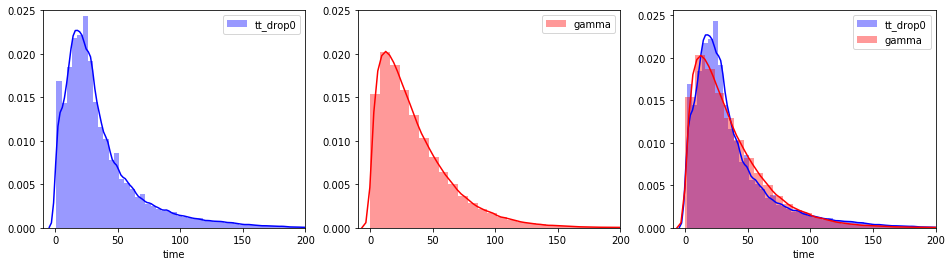

In [38]:
plt.figure(figsize = (16,4))
plt.subplot(1,3,1)
sns.distplot(tt_drop0.time, color = 'blue', label='tt_drop0')
plt.legend()
plt.xlim(-10,200)
plt.ylim(0,0.025)

plt.subplot(1,3,2)
sns.distplot(y, color = 'red', label='gamma')
plt.legend()
plt.xlim(-10,200)
plt.ylim(0,0.025)

plt.subplot(1,3,3)
sns.distplot(tt_drop0.time, color = 'blue', label='tt_drop0')
sns.distplot(y, color = 'red', label='gamma')
plt.legend()
plt.xlim(-10,200)

plt.show()
plt.close()

---

---

# 3. MPG

# # <U>"1/time"</U> 을 감마 피팅 할게 : Gamma(alpha, beta) 구한다.

In [247]:
1/35

0.02857142857142857

In [56]:
tt_drop0.mean()

time    35.704476
dtype: float64

---

: 여기서부터, tt_drop0drop1 이용한다.

In [114]:
## tt_inver = 1/tt_drop0drop1

tt_inver = 1/tt_drop0drop1

In [115]:
tt_inver

,time
2,0.043478
4,0.016949
6,0.032258
7,0.043478
8,0.016667
9,0.125000
11,0.018868
14,0.006757
15,0.031250
17,0.034483


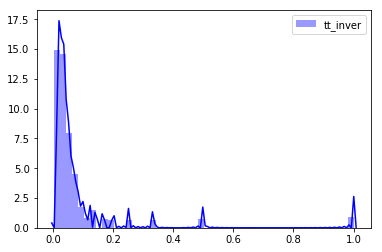

In [50]:
## 1/tt_drop0

plt.figure()
sns.distplot( tt_inver, color = 'blue', label='tt_inver')
plt.legend()
#plt.xlim(-3,55)

plt.show()
plt.close()

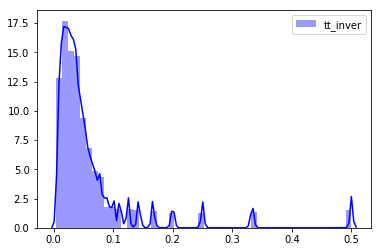

In [53]:
## 1/tt_drop0drop1

plt.figure()
sns.distplot( tt_inver, color = 'blue', label='tt_inver')
plt.legend()
#plt.xlim(-3,55)

plt.show()
plt.close()

In [116]:
alpha_, _ , scale_ = stats.gamma.fit(tt_inver, floc=0) 

In [117]:
y_ = stats.gamma.rvs(a = alpha_ , scale=scale_ , size = tt_drop0drop1.shape[0])

In [118]:
(alpha_, 1/scale_)

(1.2977043340506114, 21.87099460924458)

In [119]:
y_.mean()

0.05929079422795919

In [120]:
1/y_.mean()

16.866024701157396

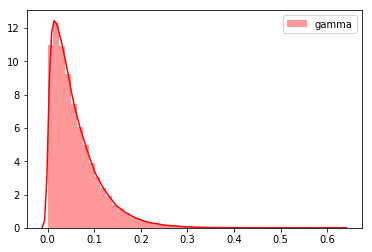

In [121]:
plt.figure()
sns.distplot( y_, color = 'red', label='gamma')
plt.legend()
#plt.xlim(-3,55)

plt.show()
plt.close()

In [122]:
# 함수로 출력되는게 많게했어!

def func_lamb(train, test, test_id, current, alpha, beta, tmean):
    t_ = (current - train[train.m_id == test_id].iloc[-1].biz_dt).days  # 구매이력이 없는사람은?(고려해야해) - 지금은 있는 사람만.
    t_purch = (train[train.m_id == test_id].iloc[-1].biz_dt - train[train.m_id == test_id].iloc[0].biz_dt).days
    k = train.biz_dt[train.m_id == test_id].shape[0] # train 구매이력
    if k <= 1 :
        tmean_u = tmean # tmean : 모든 user들의 상품에대한 평균 t(구매이력이 한번밖에 없으니, user의 고유 평균 t값 대입할 수 없다.)
    else:
        tmean_u = train.biz_dt[train.m_id == test_id].diff().mean().days
    lamb = (k+alpha)/(t_purch+2*abs(tmean_u-t_)+beta)
    return lamb, t_, t_purch, tmean_u, k

In [123]:
alpha_, scale_

(1.2977043340506114, 0.04572265769647774)

In [125]:
alpha_*(scale_)

0.05933449105703171

In [126]:
1/scale_  # beta

21.87099460924458

In [127]:
## using "1/tt_drop0drop1"

for j in range(len(test_id_[:10])):
    for i in range(30):
        lamb, t_, t_purch, tmean_u, k = func_lamb(train = diaper_train, test = diaper_test, test_id=test_id_[j], 
                  alpha = alpha_ , beta=1/scale_ , tmean = tt_drop0drop1.mean().item() , current=current_l[i])
        
        if i == 0:
            print('last order:', diaper_train.biz_dt[diaper_train.m_id == test_id_[j]][-1:])
        print('current:',current_l[i], 'current-last_order:', t_ , 't_purch:', t_purch)  
        print('pred:',(1-stats.poisson.pmf(mu = lamb, k=0)),', tmean_u:',tmean_u,', k:',k ,'\n')
    
    print('------------------------------------------------------------------------')
    print('\n')

last order: 5853334   2018-03-01 00:41:34
Name: biz_dt, dtype: datetime64[ns]
current: 2018-08-01 00:00:00 current-last_order: 152 t_purch: 59
pred: 0.013061956199485136 , tmean_u: 29 , k: 3 

current: 2018-08-02 00:00:00 current-last_order: 153 t_purch: 59
pred: 0.012983038970627137 , tmean_u: 29 , k: 3 

current: 2018-08-03 00:00:00 current-last_order: 154 t_purch: 59
pred: 0.012905069599748242 , tmean_u: 29 , k: 3 

current: 2018-08-04 00:00:00 current-last_order: 155 t_purch: 59
pred: 0.012828031112248617 , tmean_u: 29 , k: 3 

current: 2018-08-05 00:00:00 current-last_order: 156 t_purch: 59
pred: 0.012751906936434021 , tmean_u: 29 , k: 3 

current: 2018-08-06 00:00:00 current-last_order: 157 t_purch: 59
pred: 0.012676680891632985 , tmean_u: 29 , k: 3 

current: 2018-08-07 00:00:00 current-last_order: 158 t_purch: 59
pred: 0.012602337176730871 , tmean_u: 29 , k: 3 

current: 2018-08-08 00:00:00 current-last_order: 159 t_purch: 59
pred: 0.012528860359106386 , tmean_u: 29 , k: 3 

cu

current: 2018-08-09 00:00:00 current-last_order: 151 t_purch: 0
pred: 0.009105860045491965 , tmean_u: 36.34455441887949 , k: 1 

current: 2018-08-10 00:00:00 current-last_order: 152 t_purch: 0
pred: 0.009034254584743051 , tmean_u: 36.34455441887949 , k: 1 

current: 2018-08-11 00:00:00 current-last_order: 153 t_purch: 0
pred: 0.008963766492880776 , tmean_u: 36.34455441887949 , k: 1 

current: 2018-08-12 00:00:00 current-last_order: 154 t_purch: 0
pred: 0.008894369818551184 , tmean_u: 36.34455441887949 , k: 1 

current: 2018-08-13 00:00:00 current-last_order: 155 t_purch: 0
pred: 0.008826039407862418 , tmean_u: 36.34455441887949 , k: 1 

current: 2018-08-14 00:00:00 current-last_order: 156 t_purch: 0
pred: 0.00875875087398681 , tmean_u: 36.34455441887949 , k: 1 

current: 2018-08-15 00:00:00 current-last_order: 157 t_purch: 0
pred: 0.00869248056814309 , tmean_u: 36.34455441887949 , k: 1 

current: 2018-08-16 00:00:00 current-last_order: 158 t_purch: 0
pred: 0.008627205551885342 , tmean_

current: 2018-08-16 00:00:00 current-last_order: 17 t_purch: 11
pred: 0.07278457795893367 , tmean_u: 5 , k: 3 

current: 2018-08-17 00:00:00 current-last_order: 18 t_purch: 11
pred: 0.07040109210817536 , tmean_u: 5 , k: 3 

current: 2018-08-18 00:00:00 current-last_order: 19 t_purch: 11
pred: 0.06816869570834194 , tmean_u: 5 , k: 3 

current: 2018-08-19 00:00:00 current-last_order: 20 t_purch: 11
pred: 0.06607346960125837 , tmean_u: 5 , k: 3 

current: 2018-08-20 00:00:00 current-last_order: 21 t_purch: 11
pred: 0.06410315275136758 , tmean_u: 5 , k: 3 

current: 2018-08-21 00:00:00 current-last_order: 22 t_purch: 11
pred: 0.06224690257694787 , tmean_u: 5 , k: 3 

current: 2018-08-22 00:00:00 current-last_order: 23 t_purch: 11
pred: 0.06049509566825828 , tmean_u: 5 , k: 3 

current: 2018-08-23 00:00:00 current-last_order: 24 t_purch: 11
pred: 0.058839161172537624 , tmean_u: 5 , k: 3 

current: 2018-08-24 00:00:00 current-last_order: 25 t_purch: 11
pred: 0.05727144076686874 , tmean_u: 5 

current: 2018-08-20 00:00:00 current-last_order: 62 t_purch: 0
pred: 0.03090940006992382 , tmean_u: 36.34455441887949 , k: 1 

current: 2018-08-21 00:00:00 current-last_order: 63 t_purch: 0
pred: 0.03009964609237148 , tmean_u: 36.34455441887949 , k: 1 

current: 2018-08-22 00:00:00 current-last_order: 64 t_purch: 0
pred: 0.0293312332104797 , tmean_u: 36.34455441887949 , k: 1 

current: 2018-08-23 00:00:00 current-last_order: 65 t_purch: 0
pred: 0.02860107451683913 , tmean_u: 36.34455441887949 , k: 1 

current: 2018-08-24 00:00:00 current-last_order: 66 t_purch: 0
pred: 0.027906382948779118 , tmean_u: 36.34455441887949 , k: 1 

current: 2018-08-25 00:00:00 current-last_order: 67 t_purch: 0
pred: 0.027244635747364243 , tmean_u: 36.34455441887949 , k: 1 

current: 2018-08-26 00:00:00 current-last_order: 68 t_purch: 0
pred: 0.026613543854269173 , tmean_u: 36.34455441887949 , k: 1 

current: 2018-08-27 00:00:00 current-last_order: 69 t_purch: 0
pred: 0.026011025464312443 , tmean_u: 36.34455

current: 2018-08-23 00:00:00 current-last_order: 54 t_purch: 0
pred: 0.03938577483791539 , tmean_u: 36.34455441887949 , k: 1 

current: 2018-08-24 00:00:00 current-last_order: 55 t_purch: 0
pred: 0.03808044344327477 , tmean_u: 36.34455441887949 , k: 1 

current: 2018-08-25 00:00:00 current-last_order: 56 t_purch: 0
pred: 0.03685884954028407 , tmean_u: 36.34455441887949 , k: 1 

current: 2018-08-26 00:00:00 current-last_order: 57 t_purch: 0
pred: 0.0357131867578826 , tmean_u: 36.34455441887949 , k: 1 

current: 2018-08-27 00:00:00 current-last_order: 58 t_purch: 0
pred: 0.03463658970256489 , tmean_u: 36.34455441887949 , k: 1 

current: 2018-08-28 00:00:00 current-last_order: 59 t_purch: 0
pred: 0.03362299633905064 , tmean_u: 36.34455441887949 , k: 1 

current: 2018-08-29 00:00:00 current-last_order: 60 t_purch: 0
pred: 0.03266703383462055 , tmean_u: 36.34455441887949 , k: 1 

current: 2018-08-30 00:00:00 current-last_order: 61 t_purch: 0
pred: 0.03176392332929079 , tmean_u: 36.344554418

문제 : unit time이 늘어나야할듯

---

# # 1주일 단위로

In [128]:
tt_inver7 = tt_inver*7

In [129]:
tt_inver7.time.value_counts()

0.500000    6597
0.350000    6597
0.333333    6572
0.466667    6335
0.411765    6236
0.388889    6232
0.538462    6209
0.368421    6181
0.259259    6042
0.437500    5940
0.250000    5882
0.318182    5860
0.304348    5682
0.269231    5579
0.291667    5531
0.583333    5476
0.280000    5429
0.241379    5348
0.636364    4833
0.233333    4809
0.700000    4765
0.225806    4498
0.777778    4374
0.875000    4236
0.218750    4166
1.000000    4122
0.212121    4075
3.500000    4018
0.205882    3960
1.166667    3873
            ... 
0.039773      45
0.037838      38
0.036269      37
0.038889      35
0.038043      34
0.040000      34
0.037634      30
0.036649      27
0.036458      26
0.036842      26
0.037433      25
0.036082      24
0.037037      24
0.037234      24
0.035533      21
0.035176      21
0.034314      18
0.035714      16
0.035000      15
0.034653      13
0.035897      13
0.035354      13
0.034826      12
0.034483      11
0.033981       9
0.034146       7
0.033333       6
0.033493      

In [130]:
print(tt_inver.shape[0], sum(tt_inver7.time == 3.5)  )  # 27만개중에, 약 4018개가 time-interval=2이야(지금 제일 짧은 주기)

270770 4018


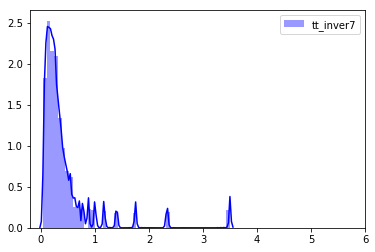

In [141]:
## tt_inver7(1주 단위)

plt.figure()
sns.distplot( tt_inver7, color = 'blue', label='tt_inver7')
plt.legend()
plt.xlim(-0.2,6)

plt.show()
plt.close()

In [132]:
alpha_, _ , scale_ = stats.gamma.fit(tt_inver7, floc=0) 

In [133]:
alpha_, scale_

(1.2977043340506158, 0.32005860387534313)

In [134]:
y_ = stats.gamma.rvs(a = alpha_ , scale=scale_ , size = tt_drop0.shape[0])

In [135]:
(alpha_*scale_)

0.415341437399222

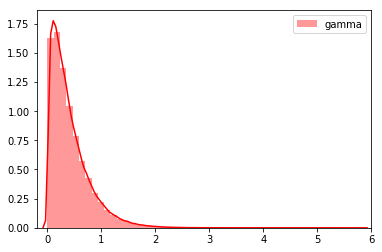

In [142]:
# 1주단위

plt.figure()
sns.distplot( y_, color = 'red', label='gamma')
plt.legend()
plt.xlim(-0.2,6)

plt.show()
plt.close()

---

# 왜 inverse로 추정하니,  35일에서 13일로 줄었느냐? 를 말해 줄 수 있다...

In [71]:
x = [2,2,2,2,2,2]
x = pd.DataFrame(x)

In [72]:
x.mean()

0    2.0
dtype: float64

In [73]:
x_inv = 1/x

In [74]:
x_inv.mean()

0    0.5
dtype: float64

In [80]:
1/x_inv.mean()

0    2.0
dtype: float64

In [77]:
y = [1,1,1,3,3,3]
y = pd.DataFrame(y)

In [78]:
y.mean()

0    2.0
dtype: float64

In [79]:
y_inv = 1/y
y_inv.mean()

0    0.666667
dtype: float64

In [81]:
1/y_inv.mean()

0    1.5
dtype: float64

---

# # time-interval ==1인값을 빼줄게! : inverse 로 추정하니깐 너무 주기가 짧게 나온다.

In [95]:
## 앞에서, tt_inver 는 tt_drop0drop1으로 만들어진 데이터야.

tt_inver7 = tt_inver*7

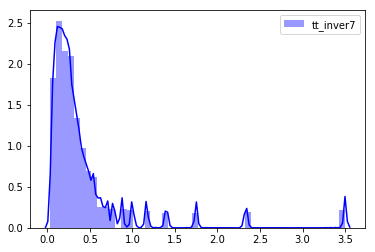

In [151]:
plt.figure()
sns.distplot( tt_inver7 , color = 'blue', label='tt_inver7')
plt.legend()
#plt.xlim(-3,55)

plt.show()
plt.close()

In [152]:
alpha_, _ , scale_ = stats.gamma.fit(tt_inver7, floc=0) 

In [153]:
alpha_, scale_

(1.2977043340506158, 0.32005860387534313)

In [157]:
alpha_*scale_

0.415341437399222

In [158]:
tt_inver7.var()

time    0.285373
dtype: float64

In [159]:
tt_inver7.mean()

time    0.415341
dtype: float64

In [160]:
tt_inver7.var()/tt_inver7.mean()

time    0.687081
dtype: float64

In [ ]:
tt

In [154]:
y_ = stats.gamma.rvs(a = alpha_ , scale=scale_ , size = tt_drop0.shape[0])

In [155]:
(alpha_*scale_)

0.415341437399222

In [156]:
1/0.415341437399222

2.4076576762043853

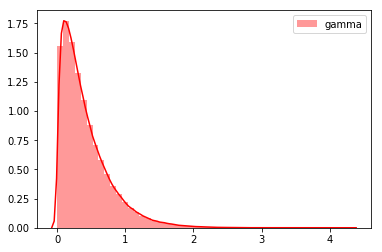

In [107]:
plt.figure()
sns.distplot( y_, color = 'red', label='gamma')
plt.legend()
#plt.xlim(-3,55)

plt.show()
plt.close()

In [110]:
y_.shape

(275764,)

In [111]:
y_.mean()

0.4157731775208772

---

In [145]:
# 함수로 출력되는게 많게했어! & unit time을 1주일로 변경.

def func_lamb(train, test, test_id, current, alpha, beta, tmean):
    t_ = (current - train[train.m_id == test_id].iloc[-1].biz_dt).days/7  # 구매이력이 없는사람은?(고려해야해) - 지금은 있는 사람만.
    t_purch = (train[train.m_id == test_id].iloc[-1].biz_dt - train[train.m_id == test_id].iloc[0].biz_dt).days/7
    k = train.biz_dt[train.m_id == test_id].shape[0] # train 구매이력
    if k <= 1 :
        tmean_u = tmean # tmean : 모든 user들의 상품에대한 평균 t(구매이력이 한번밖에 없으니, user의 고유 평균 t값 대입할 수 없다.)
    else:
        tmean_u = train.biz_dt[train.m_id == test_id].diff().mean().days/7
    lamb = (k+alpha)/(t_purch+2*abs(tmean_u-t_)+beta)
    return lamb, t_, t_purch, tmean_u, k

In [146]:
alpha_, 1/scale_

(1.2977043340506158, 3.1244278013206648)

In [147]:
1.2977043340506158/3.1244278013206648

0.415341437399222

In [148]:
for j in range(len(test_id_[:30])):
    for i in range(30):
        lamb, t_, t_purch, tmean_u, k = func_lamb(train = diaper_train, test = diaper_test, test_id=test_id_[j], 
                  alpha = alpha_ , beta=1/scale_ , tmean = tt_drop0.mean().item()/7 , current=current_l[i])
        
        if i == 0:
            print('user:[{}]'.format(j),'last order:', diaper_train.biz_dt[diaper_train.m_id == test_id_[j]][-1:], '\n')
        print('current:',current_l[i], 'current-last_order:', t_ , 't_purch:', t_purch)  
        print('pred:',(1-stats.poisson.pmf(mu = lamb, k=0)),', tmean_u:',tmean_u,', k:',k ,'\n')
    
    print('------------------------------------------------------------------------')
    print('\n')

user:[0] last order: 5853334   2018-03-01 00:41:34
Name: biz_dt, dtype: datetime64[ns] 

current: 2018-08-01 00:00:00 current-last_order: 21.714285714285715 t_purch: 8.428571428571429
pred: 0.08792777348410685 , tmean_u: 4.142857142857143 , k: 3 

current: 2018-08-02 00:00:00 current-last_order: 21.857142857142858 t_purch: 8.428571428571429
pred: 0.08741713517889371 , tmean_u: 4.142857142857143 , k: 3 

current: 2018-08-03 00:00:00 current-last_order: 22.0 t_purch: 8.428571428571429
pred: 0.08691238941030022 , tmean_u: 4.142857142857143 , k: 3 

current: 2018-08-04 00:00:00 current-last_order: 22.142857142857142 t_purch: 8.428571428571429
pred: 0.08641343484345043 , tmean_u: 4.142857142857143 , k: 3 

current: 2018-08-05 00:00:00 current-last_order: 22.285714285714285 t_purch: 8.428571428571429
pred: 0.08592017245199435 , tmean_u: 4.142857142857143 , k: 3 

current: 2018-08-06 00:00:00 current-last_order: 22.428571428571427 t_purch: 8.428571428571429
pred: 0.08543250545279446 , tmean_u

current: 2018-08-22 00:00:00 current-last_order: 3.2857142857142856 t_purch: 25.857142857142858
pred: 0.33261943470019395 , tmean_u: 2.5714285714285716 , k: 11 

current: 2018-08-23 00:00:00 current-last_order: 3.4285714285714284 t_purch: 25.857142857142858
pred: 0.33010263317161115 , tmean_u: 2.5714285714285716 , k: 11 

current: 2018-08-24 00:00:00 current-last_order: 3.5714285714285716 t_purch: 25.857142857142858
pred: 0.32762302181031167 , tmean_u: 2.5714285714285716 , k: 11 

current: 2018-08-25 00:00:00 current-last_order: 3.7142857142857144 t_purch: 25.857142857142858
pred: 0.32517979889295223 , tmean_u: 2.5714285714285716 , k: 11 

current: 2018-08-26 00:00:00 current-last_order: 3.857142857142857 t_purch: 25.857142857142858
pred: 0.32277218497487403 , tmean_u: 2.5714285714285716 , k: 11 

current: 2018-08-27 00:00:00 current-last_order: 4.0 t_purch: 25.857142857142858
pred: 0.3203994221491008 , tmean_u: 2.5714285714285716 , k: 11 

current: 2018-08-28 00:00:00 current-last_ord

current: 2018-08-15 00:00:00 current-last_order: 12.857142857142858 t_purch: 18.857142857142858
pred: 0.1384528737449391 , tmean_u: 9.428571428571429 , k: 3 

current: 2018-08-16 00:00:00 current-last_order: 13.0 t_purch: 18.857142857142858
pred: 0.13719240598227445 , tmean_u: 9.428571428571429 , k: 3 

current: 2018-08-17 00:00:00 current-last_order: 13.142857142857142 t_purch: 18.857142857142858
pred: 0.1359546379729536 , tmean_u: 9.428571428571429 , k: 3 

current: 2018-08-18 00:00:00 current-last_order: 13.285714285714286 t_purch: 18.857142857142858
pred: 0.13473896322799384 , tmean_u: 9.428571428571429 , k: 3 

current: 2018-08-19 00:00:00 current-last_order: 13.428571428571429 t_purch: 18.857142857142858
pred: 0.13354479662668806 , tmean_u: 9.428571428571429 , k: 3 

current: 2018-08-20 00:00:00 current-last_order: 13.571428571428571 t_purch: 18.857142857142858
pred: 0.13237157348590567 , tmean_u: 9.428571428571429 , k: 3 

current: 2018-08-21 00:00:00 current-last_order: 13.7142

current: 2018-08-06 00:00:00 current-last_order: 10.428571428571429 t_purch: 0.0
pred: 0.15357902502196985 , tmean_u: 5.100639366580533 , k: 1 

current: 2018-08-07 00:00:00 current-last_order: 10.571428571428571 t_purch: 0.0
pred: 0.1507074580628911 , tmean_u: 5.100639366580533 , k: 1 

current: 2018-08-08 00:00:00 current-last_order: 10.714285714285714 t_purch: 0.0
pred: 0.14794105795878687 , tmean_u: 5.100639366580533 , k: 1 

current: 2018-08-09 00:00:00 current-last_order: 10.857142857142858 t_purch: 0.0
pred: 0.14527416509182922 , tmean_u: 5.100639366580533 , k: 1 

current: 2018-08-10 00:00:00 current-last_order: 11.0 t_purch: 0.0
pred: 0.14270151776191697 , tmean_u: 5.100639366580533 , k: 1 

current: 2018-08-11 00:00:00 current-last_order: 11.142857142857142 t_purch: 0.0
pred: 0.14021821791318556 , tmean_u: 5.100639366580533 , k: 1 

current: 2018-08-12 00:00:00 current-last_order: 11.285714285714286 t_purch: 0.0
pred: 0.13781970033291546 , tmean_u: 5.100639366580533 , k: 1 



current: 2018-08-02 00:00:00 current-last_order: 6.285714285714286 t_purch: 0.0
pred: 0.341754092565859 , tmean_u: 5.100639366580533 , k: 1 

current: 2018-08-03 00:00:00 current-last_order: 6.428571428571429 t_purch: 0.0
pred: 0.3280065092436877 , tmean_u: 5.100639366580533 , k: 1 

current: 2018-08-04 00:00:00 current-last_order: 6.571428571428571 t_purch: 0.0
pred: 0.31530631056157665 , tmean_u: 5.100639366580533 , k: 1 

current: 2018-08-05 00:00:00 current-last_order: 6.714285714285714 t_purch: 0.0
pred: 0.30354018941807126 , tmean_u: 5.100639366580533 , k: 1 

current: 2018-08-06 00:00:00 current-last_order: 6.857142857142857 t_purch: 0.0
pred: 0.29261028810234413 , tmean_u: 5.100639366580533 , k: 1 

current: 2018-08-07 00:00:00 current-last_order: 7.0 t_purch: 0.0
pred: 0.2824317166523702 , tmean_u: 5.100639366580533 , k: 1 

current: 2018-08-08 00:00:00 current-last_order: 7.142857142857143 t_purch: 0.0
pred: 0.27293051952874914 , tmean_u: 5.100639366580533 , k: 1 

current: 2

current: 2018-08-29 00:00:00 current-last_order: 8.571428571428571 t_purch: 0.0
pred: 0.20408569094555595 , tmean_u: 5.100639366580533 , k: 1 

current: 2018-08-30 00:00:00 current-last_order: 8.714285714285714 t_purch: 0.0
pred: 0.19905541886492661 , tmean_u: 5.100639366580533 , k: 1 

------------------------------------------------------------------------


user:[9] last order: 9742468   2018-06-01 07:35:15
Name: biz_dt, dtype: datetime64[ns] 

current: 2018-08-01 00:00:00 current-last_order: 8.571428571428571 t_purch: 21.571428571428573
pred: 0.2127075387620898 , tmean_u: 3.5714285714285716 , k: 7 

current: 2018-08-02 00:00:00 current-last_order: 8.714285714285714 t_purch: 21.571428571428573
pred: 0.21116820315800433 , tmean_u: 3.5714285714285716 , k: 7 

current: 2018-08-03 00:00:00 current-last_order: 8.857142857142858 t_purch: 21.571428571428573
pred: 0.20965087212711842 , tmean_u: 3.5714285714285716 , k: 7 

current: 2018-08-04 00:00:00 current-last_order: 9.0 t_purch: 21.5714

current: 2018-08-19 00:00:00 current-last_order: 6.0 t_purch: 2.2857142857142856
pred: 0.24735114736370323 , tmean_u: 1.1428571428571428 , k: 3 

current: 2018-08-20 00:00:00 current-last_order: 6.142857142857143 t_purch: 2.2857142857142856
pred: 0.24337539038922051 , tmean_u: 1.1428571428571428 , k: 3 

current: 2018-08-21 00:00:00 current-last_order: 6.285714285714286 t_purch: 2.2857142857142856
pred: 0.2395245090218262 , tmean_u: 1.1428571428571428 , k: 3 

current: 2018-08-22 00:00:00 current-last_order: 6.428571428571429 t_purch: 2.2857142857142856
pred: 0.23579275822900503 , tmean_u: 1.1428571428571428 , k: 3 

current: 2018-08-23 00:00:00 current-last_order: 6.571428571428571 t_purch: 2.2857142857142856
pred: 0.2321747368109799 , tmean_u: 1.1428571428571428 , k: 3 

current: 2018-08-24 00:00:00 current-last_order: 6.714285714285714 t_purch: 2.2857142857142856
pred: 0.2286653623339162 , tmean_u: 1.1428571428571428 , k: 3 

current: 2018-08-25 00:00:00 current-last_order: 6.857142

current: 2018-08-14 00:00:00 current-last_order: 2.142857142857143 t_purch: 0.0
pred: 0.2244408697350404 , tmean_u: 5.100639366580533 , k: 1 

current: 2018-08-15 00:00:00 current-last_order: 2.2857142857142856 t_purch: 0.0
pred: 0.23084783757876182 , tmean_u: 5.100639366580533 , k: 1 

current: 2018-08-16 00:00:00 current-last_order: 2.4285714285714284 t_purch: 0.0
pred: 0.2376287294962588 , tmean_u: 5.100639366580533 , k: 1 

current: 2018-08-17 00:00:00 current-last_order: 2.5714285714285716 t_purch: 0.0
pred: 0.24481697297346972 , tmean_u: 5.100639366580533 , k: 1 

current: 2018-08-18 00:00:00 current-last_order: 2.7142857142857144 t_purch: 0.0
pred: 0.25245005724594793 , tmean_u: 5.100639366580533 , k: 1 

current: 2018-08-19 00:00:00 current-last_order: 2.857142857142857 t_purch: 0.0
pred: 0.26057016043368 , tmean_u: 5.100639366580533 , k: 1 

current: 2018-08-20 00:00:00 current-last_order: 3.0 t_purch: 0.0
pred: 0.2692248942452149 , tmean_u: 5.100639366580533 , k: 1 

current:

current: 2018-08-07 00:00:00 current-last_order: 29.0 t_purch: 0.0
pred: 0.044118204226330726 , tmean_u: 5.100639366580533 , k: 1 

current: 2018-08-08 00:00:00 current-last_order: 29.142857142857142 t_purch: 0.0
pred: 0.04387753277953843 , tmean_u: 5.100639366580533 , k: 1 

current: 2018-08-09 00:00:00 current-last_order: 29.285714285714285 t_purch: 0.0
pred: 0.04363947244104016 , tmean_u: 5.100639366580533 , k: 1 

current: 2018-08-10 00:00:00 current-last_order: 29.428571428571427 t_purch: 0.0
pred: 0.04340398095445075 , tmean_u: 5.100639366580533 , k: 1 

current: 2018-08-11 00:00:00 current-last_order: 29.571428571428573 t_purch: 0.0
pred: 0.043171016970133036 , tmean_u: 5.100639366580533 , k: 1 

current: 2018-08-12 00:00:00 current-last_order: 29.714285714285715 t_purch: 0.0
pred: 0.04294054002101011 , tmean_u: 5.100639366580533 , k: 1 

current: 2018-08-13 00:00:00 current-last_order: 29.857142857142858 t_purch: 0.0
pred: 0.04271251049914826 , tmean_u: 5.100639366580533 , k: 1

current: 2018-08-03 00:00:00 current-last_order: 1.8571428571428572 t_purch: 6.0
pred: 0.3138482825447211 , tmean_u: 3.0 , k: 3 

current: 2018-08-04 00:00:00 current-last_order: 2.0 t_purch: 6.0
pred: 0.32045401457518996 , tmean_u: 3.0 , k: 3 

current: 2018-08-05 00:00:00 current-last_order: 2.142857142857143 t_purch: 6.0
pred: 0.32733930713388815 , tmean_u: 3.0 , k: 3 

current: 2018-08-06 00:00:00 current-last_order: 2.2857142857142856 t_purch: 6.0
pred: 0.3345219097213865 , tmean_u: 3.0 , k: 3 

current: 2018-08-07 00:00:00 current-last_order: 2.4285714285714284 t_purch: 6.0
pred: 0.3420210619469717 , tmean_u: 3.0 , k: 3 

current: 2018-08-08 00:00:00 current-last_order: 2.5714285714285716 t_purch: 6.0
pred: 0.3498576463043407 , tmean_u: 3.0 , k: 3 

current: 2018-08-09 00:00:00 current-last_order: 2.7142857142857144 t_purch: 6.0
pred: 0.35805435877269165 , tmean_u: 3.0 , k: 3 

current: 2018-08-10 00:00:00 current-last_order: 2.857142857142857 t_purch: 6.0
pred: 0.366635899381642

current: 2018-08-02 00:00:00 current-last_order: 4.428571428571429 t_purch: 0.0
pred: 0.4020170506864843 , tmean_u: 5.100639366580533 , k: 1 

current: 2018-08-03 00:00:00 current-last_order: 4.571428571428571 t_purch: 0.0
pred: 0.42265517770120176 , tmean_u: 5.100639366580533 , k: 1 

current: 2018-08-04 00:00:00 current-last_order: 4.714285714285714 t_purch: 0.0
pred: 0.44544431969707166 , tmean_u: 5.100639366580533 , k: 1 

current: 2018-08-05 00:00:00 current-last_order: 4.857142857142857 t_purch: 0.0
pred: 0.4707174068264106 , tmean_u: 5.100639366580533 , k: 1 

current: 2018-08-06 00:00:00 current-last_order: 5.0 t_purch: 0.0
pred: 0.4988711817599074 , tmean_u: 5.100639366580533 , k: 1 

current: 2018-08-07 00:00:00 current-last_order: 5.142857142857143 t_purch: 0.0
pred: 0.511320924574441 , tmean_u: 5.100639366580533 , k: 1 

current: 2018-08-08 00:00:00 current-last_order: 5.285714285714286 t_purch: 0.0
pred: 0.4818578172852943 , tmean_u: 5.100639366580533 , k: 1 

current: 201

current: 2018-08-29 00:00:00 current-last_order: 4.714285714285714 t_purch: 29.0
pred: 0.32064877128361247 , tmean_u: 2.2857142857142856 , k: 13 

current: 2018-08-30 00:00:00 current-last_order: 4.857142857142857 t_purch: 29.0
pred: 0.318632154765187 , tmean_u: 2.2857142857142856 , k: 13 

------------------------------------------------------------------------


user:[20] last order: 3486640   2018-07-19 13:24:13
Name: biz_dt, dtype: datetime64[ns] 

current: 2018-08-01 00:00:00 current-last_order: 1.7142857142857142 t_purch: 27.142857142857142
pred: 0.2074151189128881 , tmean_u: 4.428571428571429 , k: 7 

current: 2018-08-02 00:00:00 current-last_order: 1.8571428571428572 t_purch: 27.142857142857142
pred: 0.20890031227204553 , tmean_u: 4.428571428571429 , k: 7 

current: 2018-08-03 00:00:00 current-last_order: 2.0 t_purch: 27.142857142857142
pred: 0.21040681648867643 , tmean_u: 4.428571428571429 , k: 7 

current: 2018-08-04 00:00:00 current-last_order: 2.142857142857143 t_purch: 27.

current: 2018-08-21 00:00:00 current-last_order: 8.142857142857142 t_purch: 0.14285714285714285
pred: 0.19731883914976855 , tmean_u: 0.0 , k: 3 

current: 2018-08-22 00:00:00 current-last_order: 8.285714285714286 t_purch: 0.14285714285714285
pred: 0.1947739303071735 , tmean_u: 0.0 , k: 3 

current: 2018-08-23 00:00:00 current-last_order: 8.428571428571429 t_purch: 0.14285714285714285
pred: 0.19229355555610184 , tmean_u: 0.0 , k: 3 

current: 2018-08-24 00:00:00 current-last_order: 8.571428571428571 t_purch: 0.14285714285714285
pred: 0.18987530223472615 , tmean_u: 0.0 , k: 3 

current: 2018-08-25 00:00:00 current-last_order: 8.714285714285714 t_purch: 0.14285714285714285
pred: 0.18751687585545518 , tmean_u: 0.0 , k: 3 

current: 2018-08-26 00:00:00 current-last_order: 8.857142857142858 t_purch: 0.14285714285714285
pred: 0.18521609299807473 , tmean_u: 0.0 , k: 3 

current: 2018-08-27 00:00:00 current-last_order: 9.0 t_purch: 0.14285714285714285
pred: 0.1829708747064085 , tmean_u: 0.0 , k

current: 2018-08-15 00:00:00 current-last_order: 9.857142857142858 t_purch: 20.285714285714285
pred: 0.16406851608281103 , tmean_u: 10.142857142857142 , k: 3 

current: 2018-08-16 00:00:00 current-last_order: 10.0 t_purch: 20.285714285714285
pred: 0.16587286286183245 , tmean_u: 10.142857142857142 , k: 3 

current: 2018-08-17 00:00:00 current-last_order: 10.142857142857142 t_purch: 20.285714285714285
pred: 0.16771721439695852 , tmean_u: 10.142857142857142 , k: 3 

current: 2018-08-18 00:00:00 current-last_order: 10.285714285714286 t_purch: 20.285714285714285
pred: 0.16587286286183234 , tmean_u: 10.142857142857142 , k: 3 

current: 2018-08-19 00:00:00 current-last_order: 10.428571428571429 t_purch: 20.285714285714285
pred: 0.16406851608281103 , tmean_u: 10.142857142857142 , k: 3 

current: 2018-08-20 00:00:00 current-last_order: 10.571428571428571 t_purch: 20.285714285714285
pred: 0.1623028905234436 , tmean_u: 10.142857142857142 , k: 3 

current: 2018-08-21 00:00:00 current-last_order: 1

current: 2018-08-06 00:00:00 current-last_order: 3.142857142857143 t_purch: 9.0
pred: 0.25356241284091086 , tmean_u: 4.428571428571429 , k: 3 

current: 2018-08-07 00:00:00 current-last_order: 3.2857142857142856 t_purch: 9.0
pred: 0.2578780044353477 , tmean_u: 4.428571428571429 , k: 3 

current: 2018-08-08 00:00:00 current-last_order: 3.4285714285714284 t_purch: 9.0
pred: 0.26234170742009477 , tmean_u: 4.428571428571429 , k: 3 

current: 2018-08-09 00:00:00 current-last_order: 3.5714285714285716 t_purch: 9.0
pred: 0.2669611941072769 , tmean_u: 4.428571428571429 , k: 3 

current: 2018-08-10 00:00:00 current-last_order: 3.7142857142857144 t_purch: 9.0
pred: 0.27174466849103596 , tmean_u: 4.428571428571429 , k: 3 

current: 2018-08-11 00:00:00 current-last_order: 3.857142857142857 t_purch: 9.0
pred: 0.27670091225925786 , tmean_u: 4.428571428571429 , k: 3 

current: 2018-08-12 00:00:00 current-last_order: 4.0 t_purch: 9.0
pred: 0.2818393355468095 , tmean_u: 4.428571428571429 , k: 3 

curre

current: 2018-08-02 00:00:00 current-last_order: 9.428571428571429 t_purch: 0.0
pred: 0.17720357667701292 , tmean_u: 5.100639366580533 , k: 1 

current: 2018-08-03 00:00:00 current-last_order: 9.571428571428571 t_purch: 0.0
pred: 0.17339465370229468 , tmean_u: 5.100639366580533 , k: 1 

current: 2018-08-04 00:00:00 current-last_order: 9.714285714285714 t_purch: 0.0
pred: 0.16974551669152005 , tmean_u: 5.100639366580533 , k: 1 

current: 2018-08-05 00:00:00 current-last_order: 9.857142857142858 t_purch: 0.0
pred: 0.16624635086113415 , tmean_u: 5.100639366580533 , k: 1 

current: 2018-08-06 00:00:00 current-last_order: 10.0 t_purch: 0.0
pred: 0.16288812628856553 , tmean_u: 5.100639366580533 , k: 1 

current: 2018-08-07 00:00:00 current-last_order: 10.142857142857142 t_purch: 0.0
pred: 0.1596625212925984 , tmean_u: 5.100639366580533 , k: 1 

current: 2018-08-08 00:00:00 current-last_order: 10.285714285714286 t_purch: 0.0
pred: 0.15656185458098393 , tmean_u: 5.100639366580533 , k: 1 

curr

current: 2018-08-29 00:00:00 current-last_order: 14.285714285714286 t_purch: 0.0
pred: 0.10138171005571883 , tmean_u: 5.100639366580533 , k: 1 

current: 2018-08-30 00:00:00 current-last_order: 14.428571428571429 t_purch: 0.0
pred: 0.10012071531125077 , tmean_u: 5.100639366580533 , k: 1 

------------------------------------------------------------------------


user:[29] last order: 3747019   2018-03-17 02:40:32
Name: biz_dt, dtype: datetime64[ns] 

current: 2018-08-01 00:00:00 current-last_order: 19.428571428571427 t_purch: 6.714285714285714
pred: 0.12911909758583284 , tmean_u: 1.5714285714285714 , k: 5 

current: 2018-08-02 00:00:00 current-last_order: 19.571428571428573 t_purch: 6.714285714285714
pred: 0.12836832098927253 , tmean_u: 1.5714285714285714 , k: 5 

current: 2018-08-03 00:00:00 current-last_order: 19.714285714285715 t_purch: 6.714285714285714
pred: 0.12762621039492794 , tmean_u: 1.5714285714285714 , k: 5 

current: 2018-08-04 00:00:00 current-last_order: 19.8571428571428